# Assignment Kennis en Data

## Notebook made by


|Naam|Studentnummer|
|-|-|
|Jochem|secret |
|Juriaan|secret |
|Bart|secret |
| | |

## Peerreview

* Vul onderstaande dict/tabel in en run de cel. Klopt het? Zijn jullie het er allemaal mee eens?
    * Verander `1,2,3,4` door jullie studentnummers
    * `1: {1:.2,2:.3,3:.3,4:.2}` betekent dat student 1 zijn punt zo over de 4 studenten verdeelt
    * Let op, per student moeten de punten optellen tot 1!
    * De gegeven punten staan in de tabel op de rijen, de ontvangen punten in de kolommen.
    * met `cijfer_per_student` kan je bepalen welk cijfer ieder krijgt bij een gegeven groepscijfer.

## Toelichting

* De meeste opgaven worden automatisch nagekeken. Bij vrijwel alle opdrachten staan er een paar tests onder de opdracht, dit is voornamelijk om te zorgen dat je de juiste type output geeft. Dit zijn dus *NIET* alle tests, die komen er bij het graden nog bij.
* Elke vraag is 1 punt waard, tenzij anders aangegeven. Soms is die punt onderverdeeld in deelpunten, maar niet altijd. 

## Voor het inleveren!

* Pas niet de cellen aan, vooral niet die je niet kunt editen. Dit levert problemen op bij nakijken. Twijfel je of je per ongeluk iets hebt gewijzigd, kopieer dan bij inleveren je antwoorden naar een nieuw bestand, zodat het niet fout kan gaan.

* Zorg dat de code goed runt van boven naar beneden, verifieer dat door boven in Kernel -> Restart & Run All uit te voeren

## Na het inleveren!

* Het gebeurt erg vaak dat mensen een "leeg bestand" inleveren. Vaak een andere versie van de opgave die nog ergens op je computer rondslingerde. Zonde van al je werk toch!
* Dus, lever **minstens een half uur voor tijd in**. Download dan wat je hebt ingeleverd op Canvas. Geef het een andere naam om verwarring te voorkomen. En draai alle cellen, en bekijk het. Geen syntax fouten? Alle vragen gemaakt? Dan zit het vast wel goed, en hoef je niet in de zenuwen te zitten.

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#RDF-plus-RDFS-conversion" data-toc-modified-id="RDF-plus-RDFS-conversion-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>RDF plus RDFS conversion</a></span><ul class="toc-item"><li><span><a href="#Vereisten" data-toc-modified-id="Vereisten-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Vereisten</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Grading</a></span></li></ul></li></ul></div>

# RDF plus RDFS conversion

* We will transform our family and LHBTI++ knowledge base into an RDF database and query it using SPARQL.
* The idea is that **you create this notebook as a tutorial on working with `rdflib`**.
* You will find many on the web, so search, watch and use the best what you can find to make a fun and top tutorial.

## Vereisten

1. `networkx2RDF(G)` takes any digraph G with additional node attributes and transform it to an RDF database.
2. Maak SPARQL queries voor al je gedefinieerde relaties. 
    * Check dat de antwoorden identiek zijn.
3. Download een andere triple store en maak daar juist een networkx graaf van (dat kan met rdflib), en bereken wat netwerk maten daarop.

## Grading

* Deze opdracht doen we met peergrading.
* Ieder groepje kijkt alle anderen en zichzelf na en geeft ieder groepje een deel van in totaal 100 te verdelen  punten.
* De eindscores transformeren we dan naar een cijfer tussen de 1 en 10. 

In [22]:
!pip install rdflib
# See https://rdflib.readthedocs.io/en/stable/gettingstarted.html
from rdflib import  Graph

In [23]:
g=Graph()
g.parse('http://dbpedia.org/resource/Michael_Jackson')

<Graph identifier=N132f12ba94514c7c992d3147c37c8aa0 (<class 'rdflib.graph.Graph'>)>

In [24]:
triples= [triple for triple in g]
triples[:2], len(triples)

([(rdflib.term.URIRef('http://dbpedia.org/resource/Chel_White'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Can_You_Feel_It_(The_Jacksons_song)'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))],
 9368)

In [25]:
qres = g.query("""SELECT DISTINCT ?o ?p ?s WHERE {?o ?p ?s}""")

type(qres), len(qres), list(qres)[:2]

(rdflib.plugins.sparql.processor.SPARQLResult,
 9368,
 [(rdflib.term.URIRef('http://dbpedia.org/resource/Chel_White'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson')),
  (rdflib.term.URIRef('http://dbpedia.org/resource/Can_You_Feel_It_(The_Jacksons_song)'),
   rdflib.term.URIRef('http://dbpedia.org/ontology/wikiPageWikiLink'),
   rdflib.term.URIRef('http://dbpedia.org/resource/Michael_Jackson'))])

# <span style="color:blue">  *Uitleg RDF* </span> # 

Het pakket maakt gebruik van verschillende Python idiomen die een geschikte manier bieden om RDF te introduceren aan een Python programmeur die nog niet eerder met RDF heeft gewerkt. De primaire interface die RDFLib biedt voor het werken met RDF is een Graph. RDFLib graphs zijn geen gesorteerde containers; ze hebben gewone set operaties (b.v. add() om een triple toe te voegen) plus methods die triples doorzoeken en in willekeurige volgorde teruggeven.

## <span style="color:blue"> De triple </span> ##
RDFLib graphs herdefiniëren ook bepaalde ingebouwde Python methodes om zich op een voorspelbare manier te gedragen; ze imiteren container types en kunnen het beste gezien worden als een set van 3-item tuples ("triples", in RDF-taal):

[

    (subject0, predicaat0, object0),
    
    (subject1, predicaat1, object1),
    
    ...
    
    (subjectN, predicaatN, objectN)
 ]

![Triple Figuur](https://www.erfgoedleiden.nl/images/stories/odb_rdf_rembrandt4.jpg)

# <span style="color:green"> Deel 1: RDF database parsen </span>#
<span style="color:green"> Dit voorbeeld zal duidelijk maken hoe men triples voor de graph uit een al bestaande database kan "parsen".</span> 
## <span style="color:green"> 1.1 </span> ##

Maak een graaf aan in de onderstaande cel en parse een RDF-bestand. Gebruik vervolgens een forloop om door de triples te loopen en kijk hierbij of er tenminste een triple aanwezig is in de gehele graaf.

In [6]:
import rdflib

# Maak een graaf
g = rdflib.Graph()

# "Parse" in een RDF-bestand via het internet
result = g.parse("http://www.w3.org/People/Berners-Lee/card")

# Loop door de triples bestaande uit (subj, pred, obj)
for subj, pred, obj in g:
    # Check of er tenminste een triple aanwezig is in de graaf
    if (subj, pred, obj) not in g:
        raise Exception("It better be!")

## <span style="color:green"> 1.2 </span>##
Tel en print vervolgens de hoeveelheid verschillende triples aanwezig in de graaf via de onderstaande code.

In [7]:
# Print het aantal triples aanwezig in de graaf
print("graph has {} statements.".format(len(g)))

graph has 86 statements.


## <span style="color:green"> 1.3 </span> ##
Print tot slot de gebruikte graaf in een turtle formaat in de ondestaande cel. 

In [8]:
# Print de gehele graaf in het turtle-formaat
print(g.serialize(format="turtle").decode("utf-8"))

@prefix : <http://xmlns.com/foaf/0.1/> .
@prefix cc: <http://creativecommons.org/ns#> .
@prefix cert: <http://www.w3.org/ns/auth/cert#> .
@prefix con: <http://www.w3.org/2000/10/swap/pim/contact#> .
@prefix dc: <http://purl.org/dc/elements/1.1/> .
@prefix dct: <http://purl.org/dc/terms/> .
@prefix doap: <http://usefulinc.com/ns/doap#> .
@prefix geo: <http://www.w3.org/2003/01/geo/wgs84_pos#> .
@prefix ldp: <http://www.w3.org/ns/ldp#> .
@prefix rdfs: <http://www.w3.org/2000/01/rdf-schema#> .
@prefix schema: <http://schema.org/> .
@prefix sioc: <http://rdfs.org/sioc/ns#> .
@prefix solid: <http://www.w3.org/ns/solid/terms#> .
@prefix space: <http://www.w3.org/ns/pim/space#> .
@prefix vcard: <http://www.w3.org/2006/vcard/ns#> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://dig.csail.mit.edu/2005/ajar/ajaw/data#Tabulator> doap:developer <https://www.w3.org/People/Berners-Lee/card#i> .

<http://dig.csail.mit.edu/2007/01/camp/data#course> :maker <https://www.w3.org/People/Berner

Hierboven wordt een grafiek gemaakt en vervolgens een RDF-bestand online, Tim Berners-Lee's sociale netwerk details, geparseerd in die grafiek. Het print() statement gebruikt de len() functie om het aantal triples in de grafiek te tellen.

# <span style="color:green"> Deel 2: Zelf een database aanmaken </span>#
<span style="color:green"> Dit voorbeeld laat een andere methode zien, namelijk het zelf opbouwen van de graph door stuk voor stuk id's en relaties toe te voegen aan de graaf.</span>

## <span style="color:green"> 2.1 </span>## 
Een meer uitgebreid voorbeeld: In de onderstaande cel wordt een graaf aangemaakt en worden knopen hieraan toegevoegd met de add() functie. Vervolgens worden er triples toegevoegd per knoop.

In [9]:
from rdflib import Graph, Literal, RDF, URIRef
from rdflib.namespace import FOAF , XSD

# Maak een graaf
g = Graph()

# Maak een RDF-URI knoop om als subject voor meerdere triples te gebruiken
donna = URIRef("http://example.org/donna")

# Voeg triples toe aan de graaf met behulp van add
g.add((donna, RDF.type, FOAF.Person))
g.add((donna, FOAF.nick, Literal("donna", lang="ed")))
g.add((donna, FOAF.name, Literal("Donna Fales")))
g.add((donna, FOAF.mbox, URIRef("mailto:donna@example.org")))

# Voeg nog een persoon toe
ed = URIRef("http://example.org/edward")

# Voeg triples toe aan de graaf met behulp van add
g.add((ed, RDF.type, FOAF.Person))
g.add((ed, FOAF.nick, Literal("ed", datatype=XSD.string)))
g.add((ed, FOAF.name, Literal("Edward Scissorhands")))
g.add((ed, FOAF.mbox, URIRef("mailto:e.scissorhands@example.org")))

## <span style="color:green"> 2.2 </span>##
In de onderstaande cel wordt er over de triples heen geloopt en worden ze vervolgens "rauw" geprint.

In [10]:
# Loop over de triples en print ze
print("--- printing raw triples ---")
for s, p, o in g:
    print((s, p, o))

--- printing raw triples ---
(rdflib.term.URIRef('http://example.org/donna'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/mbox'), rdflib.term.URIRef('mailto:donna@example.org'))
(rdflib.term.URIRef('http://example.org/donna'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'), rdflib.term.Literal('Donna Fales'))
(rdflib.term.URIRef('http://example.org/edward'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/nick'), rdflib.term.Literal('ed', datatype=rdflib.term.URIRef('http://www.w3.org/2001/XMLSchema#string')))
(rdflib.term.URIRef('http://example.org/edward'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/Person'))
(rdflib.term.URIRef('http://example.org/edward'), rdflib.term.URIRef('http://xmlns.com/foaf/0.1/mbox'), rdflib.term.URIRef('mailto:e.scissorhands@example.org'))
(rdflib.term.URIRef('http://example.org/donna'), rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'), rdflib.term.URIRef('

## <span style="color:green"> 2.3 </span>##
Print nu de mbox property-waarde en voeg daarna een prefix toe, wat ervoor zorgt dat de output leesbaar is. 

In [11]:
# Voor elke FOAF:Persoon in de winkel, print de mbox property waarde
print("--- printing mboxes ---")
for person in g.subjects(RDF.type, FOAF.Person):
    for mbox in g.objects(person, FOAF.mbox):
        print(mbox)

# Koppel vervolgens de FOAF aan een prefix, zodat de output leesbaar is
g.bind("foaf", FOAF)

--- printing mboxes ---
mailto:donna@example.org
mailto:e.scissorhands@example.org


## <span style="color:green"> 2.4 </span> ##
Print ten slotte de data in een n3 formaat in de onderstaande cel:

In [12]:
# Print de data in een n3 formaat
print("--- printing mboxes ---")
print(g.serialize(format='n3').decode("utf-8"))

--- printing mboxes ---
@prefix foaf: <http://xmlns.com/foaf/0.1/> .
@prefix xsd: <http://www.w3.org/2001/XMLSchema#> .

<http://example.org/donna> a foaf:Person ;
    foaf:mbox <mailto:donna@example.org> ;
    foaf:name "Donna Fales" ;
    foaf:nick "donna"@ed .

<http://example.org/edward> a foaf:Person ;
    foaf:mbox <mailto:e.scissorhands@example.org> ;
    foaf:name "Edward Scissorhands" ;
    foaf:nick "ed"^^xsd:string .




# <span style="color:green"> Deel 3: RDF met een Networkx netwerk </span> #
## <span style="color:green"> 3.1 Netwerken importeren </span> ##
Nu je de basics van RDF begrijpt kunnen we aan de slag gaan met een netwerk.
We hebben hieronder twee Networkx netwerken staan, deze gaan we vervolgens omzetten naar een RDF database.
Het eerste netwerk is een directed graph van een familiestamboom, de relatie die gebruikt wordt is "ouder van".
Het tweede netwerk is een directed graph die personen en hun LHBTQ+ status en relaties aangeeft.

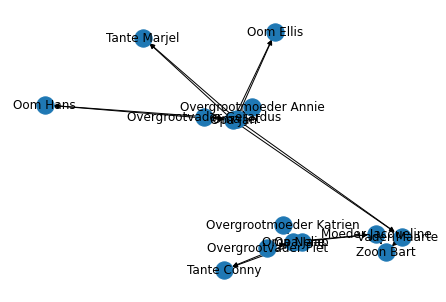

In [13]:
import networkx as nx
%matplotlib inline

# FAMILIE Bart
H= nx.DiGraph()

# Maak hier een verbinding met bijv opa naar vader
H.add_edges_from([('Opa Jaap','Moeder Jacqueline'), ("Oma Nelie",'Moeder Jacqueline'), ("Opa Jan","Vader Maarten"), ("Oma Jet","Vader Maarten"),
                  ("Vader Maarten","Zoon Bart"), ("Moeder Jacqueline","Zoon Bart"), ("Overgrootvader Gerardus","Opa Jan"), ("Overgrootmoeder Annie","Opa Jan"),
                  ("Overgrootvader Piet","Oma Nelie"), ("Overgrootmoeder Katrien","Oma Nelie"), ("Opa Jan","Oom Hans"), ("Opa Jan","Oom Ellis"),("Oma Nelie","Tante Conny"),
                  ("Opa Jan","Tante Marjel"), ("Oma Jet", "Tante Marjel"), ("Oma Jet", "Oom Hans"), ("Oma Jet", "Oom Ellis"), ("Opa Jaap", "Tante Conny")])

M,V= {"Opa Jan",'Opa Jaap',"Vader Maarten","Zoon Bart","Overgrootvader Gerardus","Overgrootvader Piet","Oom Hans","Oom Ellis"},{'Moeder Jacqueline',"Oma Nelie","Oma Jet","Overgrootmoeder Annie","Overgrootmoeder Katrien","Tante Conny","Tante Marjel"}
# Nu even de attributen M en V goed zetten
for n in M:
    H.nodes[n]['M']=True
    H.nodes[n]['V']=False
for n in V:
    H.nodes[n]['V']=True
    H.nodes[n]['M']=False    
 
G = H
def M(x, network=G):
    return network.nodes[x]['M']
# true als man 
def V(x, network=G):
    return network.nodes[x]['V']
# true als vrouw
def R(x,y,network=G):
    return network.has_edge(x,y)
# true als er een edge is tussen x en y


Opa= {(x,y) for x in H for y in H 
      if {z for z in H if R(x,z,H)} & {z for z in H if R(z,y,H)}and M(x,H)}

Oma= {(x,y) for x in H for y in H 
      if {z for z in H if R(x,z,H)} & {z for z in H if R(z,y,H)}and V(x,H)}

Vader= {(x,y) for x in H for y in H if R(x,y,H) and M(x,H)}

Moeder = {(x,y) for x in H for y in H if R(x,y,H) and V(x,H)}

Dochter = {(y,x) for x in H for y in H if R(y,x,H) and V(x,H)}

Zoon = {(y,x) for x in H for y in H if R(y,x,H) and M(x,H)}

Overgrootvader = {(x,y) for x in G for y in G for z in G
            if (x,z) in Opa and R(z,y,G)}
            
Overgrootmoeder = {(x,y) for x in G for y in G for z in G
            if (x,z) in Oma and R(z,y,G)}

Oom = {(x,y) for x in G for y in G for z in G for q in G
          if (z,x) in Opa and (z,q) in Opa and R(q,y,G) and ((x,y) not in Zoon and Dochter) and M(x,H)}

Tante = {(x,y) for x in G for y in G for z in G for q in G
          if (z,x) in Oma and (z,q) in Oma and R(q,y,G) and ((x,y) not in Zoon and Dochter) and V(x,H)}


nx.draw(H, with_labels = True)

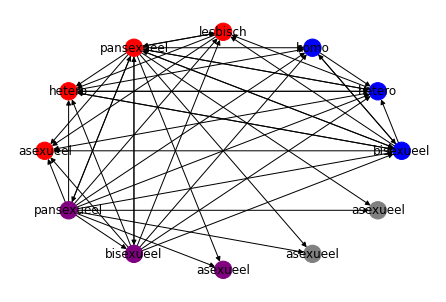

In [14]:
# gender en sexuele orientatie netwerk
gens= nx.DiGraph()

# alle mensen met hun gender en sexuele orientatie in het netwerk
# m=man, v=vrouw, t=transgender
# Julia is een intersexueel persoon in dit netwerk, ze is 90% vrouw en 10% man,
# zoals hierboven beschreven wordt ze dus gezien als een vrouw
# Sara is queer of questioning, dus in ons model genderloos en asexueel
# Stefanie is valt onder de + van LHBTQI+, dus in ons model genderloos en asexueel
gens.add_node('Piet', M=True, V=False, T=False, S='onbekend') #bisexueel
gens.add_node('Klaas', M=True, V=False, T=False, S='onbekend') #hetero
gens.add_node('Timo', M=True, V=False, T=False, S='onbekend') #homo
gens.add_node('Liesje', M=False, V=True, T=False, S='onbekend') #lesbisch
gens.add_node('Anne', M=False, V=True, T=False, S='onbekend') #pansexueel
gens.add_node('Julia', M=False, V=True, T=False, S='onbekend') #hetero
gens.add_node('Nienke', M=False, V=True, T=False, S='onbekend') #asexueel
gens.add_node('John', M=False, V=False, T=True, S='onbekend') #pansexueel
gens.add_node('Peter', M=False, V=False, T=True, S='onbekend') #bisexueel
gens.add_node('Duncan', M=False,V=False, T=True, S='onbekend') #asexueel
gens.add_node('Sarah', M=False, V=False, T=False, S='onbekend') #asexueel
gens.add_node('Stefanie', M=False, V=False, T=False, S='onbekend') #asexueel


# nu voegen we de relatie R(x, y) toe, dus of persoon x valt op persoon y
# Piet is bisexueel
gens.add_edge('Piet','Klaas')
gens.add_edge('Piet','Timo')
gens.add_edge('Piet','Liesje')
gens.add_edge('Piet','Anne')
gens.add_edge('Piet','Julia')
gens.add_edge('Piet','Nienke')

# Klaas is hetero
gens.add_edge('Klaas','Liesje')
gens.add_edge('Klaas','Anne')
gens.add_edge('Klaas','Julia')
gens.add_edge('Klaas','Nienke')

# Timo is homo
gens.add_edge('Timo','Piet')
gens.add_edge('Timo','Klaas')

# Liesje is lesbisch
gens.add_edge('Liesje','Anne')
gens.add_edge('Liesje','Julia')
gens.add_edge('Liesje','Nienke')

# Anne is pansexueel
gens.add_edge('Anne','Piet')
gens.add_edge('Anne','Klaas')
gens.add_edge('Anne','Timo')
gens.add_edge('Anne','Liesje')
gens.add_edge('Anne','Julia')
gens.add_edge('Anne','Nienke')
gens.add_edge('Anne','John')
gens.add_edge('Anne','Peter')
gens.add_edge('Anne','Duncan')
gens.add_edge('Anne','Sarah')
gens.add_edge('Anne','Stefanie')

# Julia is hetero
gens.add_edge('Julia','Piet')
gens.add_edge('Julia','Klaas')
gens.add_edge('Julia','Timo')

# Nienke is asexueel, dus valt op niks

# John is pansexueel
gens.add_edge('John','Piet')
gens.add_edge('John','Klaas')
gens.add_edge('John','Timo')
gens.add_edge('John','Liesje')
gens.add_edge('John','Anne')
gens.add_edge('John','Julia')
gens.add_edge('John','Nienke')
gens.add_edge('John','Peter')
gens.add_edge('John','Duncan')
gens.add_edge('John','Sarah')
gens.add_edge('John','Stefanie')

# Peter is bisexueel
gens.add_edge('Peter','Piet')
gens.add_edge('Peter','Klaas')
gens.add_edge('Peter','Timo')
gens.add_edge('Peter','Liesje')
gens.add_edge('Peter','Anne')
gens.add_edge('Peter','Julia')
gens.add_edge('Peter','Nienke')

# Duncan is asexueel, dus valt op niks

# Sarah is asexueel, dus valt op niks

# Stefanie +, dus valt op niks


# dit zijn de functies waarmee we makkelijk geslacht en het bestaan van 'valt op' checken
def r(x,y,network=gens):
    return network.has_edge(x,y)
def m(x, network=gens):
    return network.nodes[x]['M']
def v(x, network=gens):
    return network.nodes[x]['V']
def t(x, network=gens):
    return network.nodes[x]['T']



# vervolgens gaan we de sexuele voorkeur van ieder persoon afleiden
# gebaseerd op het gender en op wie ze wel en niet vallen.
# doordat onze logica bestaat uit veel if statements leek het ons
# onmogelijk om er een leesbare list comprehension van te maken,
# vandaar is het zoals beneden te zien is. Wel hebben we geprobeerd
# het zoveel mogelijk te laten lijken op de manier waarop de logica is opgeschreven.
for x in gens.nodes():
    
    # bisexueel
    
    # in deze lijst moet alleen maar True en dus geen False komen te staan, dan klopt
    # het 'for every y' stuk en voldoet x aan de logica van de sexuele orientatie
    true_list_bi=[]
    for y in gens.nodes(): 
        result=True
        if x != y:
            if m(x) or v(x) or t(x):
                if m(y): 
                    result = r(x,y)
                if v(y):
                    result = r(x,y)
                if t(y):
                    result = not r(x,y)
            else:
                result=False    
            true_list_bi.append(result)
    if all(true_list_bi):
        gens.nodes[x]['S']='bisexueel'
        
        
    # homo
    true_list_homo=[]
    for y in gens.nodes():
        result=True
        if x != y:
            if m(x):
                if m(y): 
                    result = r(x,y)
                if v(y):
                    result = not r(x,y)
                if t(y):
                    result = not r(x,y)
            else:
                result=False    
            true_list_homo.append(result)
    if all(true_list_homo):
        gens.nodes[x]['S']='homo'
        
        
    # lesbisch
    true_list_les=[]
    for y in gens.nodes():
        result=True
        if x != y:
            if v(x):
                if m(y): 
                    result = not r(x,y)
                if v(y):
                    result = r(x,y)
                if t(y):
                    result = not r(x,y)
            else:
                result=False    
            true_list_les.append(result)
    if all(true_list_les):
        gens.nodes[x]['S']='lesbisch'
        
    
    # pansexueel
    true_list_pan=[]
    for y in gens.nodes():
        result=True
        if x != y:
            if m(x) or v(x) or t(x):
                result = r(x,y)         
            else:
                result=False    
            true_list_pan.append(result)
    if all(true_list_pan):
        gens.nodes[x]['S']='pansexueel'
        
    # asexueel
    true_list_asex=[]
    for y in gens.nodes():
        result=True
        if x != y:
            result = not r(x,y)           
            true_list_asex.append(result)
    if all(true_list_asex):
        gens.nodes[x]['S']='asexueel'
        
    # hetero
    true_list_het=[]
    for y in gens.nodes():
        result=True
        if x != y:
            if m(x):
                if m(y): 
                    result = not r(x,y)
                if v(y):
                    result = r(x,y)
                if t(y):
                    result = not r(x,y)
            elif v(x):
                if m(y): 
                    result = r(x,y)
                if v(y):
                    result = not r(x,y)
                if t(y):
                    result = not r(x,y)
            else:
                result=False   
            true_list_het.append(result)
    if all(true_list_het):
        gens.nodes[x]['S']='hetero'

# in de graph maken we mannen blauw, vrouwen rood, transgenders paars
# en queer of questioning en wat onder + zit grijs
kleuren = []
for node in gens.nodes():
    if gens.nodes[node]['M']==True:
        kleuren.append('blue')
    elif gens.nodes[node]['V']==True:
        kleuren.append('red')
    elif gens.nodes[node]['T']==True:
        kleuren.append('purple')
    else:
        kleuren.append('grey')
        
# bij iedere node laten we de sexuele orientatie zien
orientatie = nx.get_node_attributes(gens, 'S') 

nx.draw_circular(gens, labels=orientatie, node_color=kleuren)

## <span style="color:green"> 3.2 Networkx naar RDF database </span> ##

Hieronder is de functie networkx2RDF(G) geschreven, deze neemt een willekeurige graaf G met aanvullende knoopattributen en zet die om in een RDF database. Kijk eens naar de output, dan zie je de triples die aangemaakt zijn in de RDF database.

Voor iedere node in de Networkx graph wordt een unieke id aangemaakt met behulp van Bnode(). Deze Bnode() kunnen we vervolgens dingen toewijzen, zoals een naam, geslacht of een relatie.

In [26]:
from rdflib import BNode, Literal
from rdflib.namespace import FOAF, RDF

""" Neemt een networkx DiGraph met mogelijke knoopattributen 
    en zet het om naar een RDF database """
def networkx2RDF(G):
    # Lege RDF graph aanmaken
    graph = Graph()
    
    # Ophalen van de edges en nodes met attributen
    edges = G.edges()
    nodes = G.nodes(data= True)
    
    # Lege dictionary aanmaken
    nodedict = {}
    
    # Loop door alle knopen
    for x in nodes:
        # Geef iedere knoop een unieke id
        nieuwenode = BNode()
        
        # Naam van de knoop koppelen aan de id
        naam = x[0]
        nodedict[nieuwenode] = naam
        
        # Iedere unieke knoop krijgt een naam in de database
        graph.add((nieuwenode, FOAF.name, Literal(naam)))
        
        # Als de knoop een attribuut heeft
        if len(x[1]) > 0:
            atribuutdict = x[1]
    
            # Loop door de attributen
            for attribuut in atribuutdict.items():
                # Als het attribuut waar is
                if True in attribuut:
                    # Voeg de attribuut toe aan de database
                    graph.add((nieuwenode, RDF.type, Literal(attribuut[0])))
    
    # Loop door alle lijnen    
    for y in edges:
        # Lijn gaat van naam1 naar naam2
        naam1 = y[0]
        naam2 = y[1]

        # Zoek de id die bij de naam hoort in de dictionary
        node1 = list(nodedict.keys())[list(nodedict.values()).index(naam1)]
        node2 = list(nodedict.keys())[list(nodedict.values()).index(naam2)]

        # De tweeplaatsige relatie wordt toegevoegd aan de database
        graph.add((node1, RDF.Property, node2))
    
    return graph


J = networkx2RDF(H)
triples= [triple for triple in J]
triples[:5], len(triples)

([(rdflib.term.BNode('N6d0abe8c26784131b091fc793da80000'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
   rdflib.term.Literal('V')),
  (rdflib.term.BNode('Nd860f2525345464487db921aba0aa9fb'),
   rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'),
   rdflib.term.Literal('Zoon Bart')),
  (rdflib.term.BNode('N5c1685ddd4264126b95d65ba20ef24d0'),
   rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'),
   rdflib.term.Literal('Opa Jan')),
  (rdflib.term.BNode('N4a9d254747ad475aa1294bc76f806352'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
   rdflib.term.Literal('V')),
  (rdflib.term.BNode('Ndbf54a28fc5d464f8751a20b70135e6f'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'),
   rdflib.term.BNode('N6d0abe8c26784131b091fc793da80000'))],
 48)

In [27]:
# Run function on LHBT+ graph

Z = networkx2RDF(gens)
triples= [triple for triple in Z]
triples[:5], len(triples)

([(rdflib.term.BNode('Nfd29134748e245b8895d15153f2431ad'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'),
   rdflib.term.BNode('Nc713d25b57aa4efe8cc74b0d3c4556b5')),
  (rdflib.term.BNode('Nfd29134748e245b8895d15153f2431ad'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'),
   rdflib.term.BNode('Naf16b2063ca54ff4a2b2195503a9f798')),
  (rdflib.term.BNode('Naf16b2063ca54ff4a2b2195503a9f798'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#type'),
   rdflib.term.Literal('M')),
  (rdflib.term.BNode('Nd11727c7a5c640c787e214da2129edf3'),
   rdflib.term.URIRef('http://www.w3.org/1999/02/22-rdf-syntax-ns#Property'),
   rdflib.term.BNode('Naf16b2063ca54ff4a2b2195503a9f798')),
  (rdflib.term.BNode('Nd11727c7a5c640c787e214da2129edf3'),
   rdflib.term.URIRef('http://xmlns.com/foaf/0.1/name'),
   rdflib.term.Literal('Peter'))],
 69)

# <span style="color:green"> Deel 4: Werken met SPARQL queries </span> #
## <span style="color:green"> 4.1 Familierelaties in predicaatlogica </span> ##

Hieronder staan een aantal familierelaties uitgedrukt in perdicaatlogica, lees deze even door een kijk of je ze begrijpt.

$ \forall xy(Vader(x,y) \leftrightarrow R(x,y) \wedge M(x)) $

$ \forall xy(Moeder(x,y) \leftrightarrow R(x,y) \wedge V(x)) $

$ \forall xy(Opa(x,y) \leftrightarrow \exists z(Vader(x,z) \wedge R(z,y))) $

$ \forall xy(Oma(x,y) \leftrightarrow \exists z(Moeder(x,z) \wedge R(z,y))) $

$ \forall xy(Broer(x,y) \leftrightarrow \exists mv(Moeder(m, x) \wedge Moeder(m, y) \wedge Vader(v,x) \wedge Vader(v, y) \wedge M(x)))$

$ \forall xy(Zus(x,y) \leftrightarrow \exists mv(Moeder(m, x) \wedge Moeder(m, y) \wedge Vader(v,x) \wedge Vader(v, y) \wedge V(x)))$

$ \forall xy(Zoon(x,y) \leftrightarrow (R(y,x) \wedge M(x))) $

$ \forall xy(Dochter(x,y) \leftrightarrow (R(y,x) \wedge V(x))) $

$ \forall xy(Oom(x,y) \leftrightarrow \exists z(R(z,y) \wedge Broer(x,z))) $

$ \forall xy(Tante(x,y) \leftrightarrow \exists z(R(z,y) \wedge Zus(x,z))) $

$ \forall xy(Overgrootvader(x,y) \leftrightarrow \exists z((Opa(z,y) \vee Oma(z,y)) \wedge Vader(x,z))) $

$ \forall xy(Overgrootmoeder(x,y) \leftrightarrow \exists z((Opa(z,y) \vee Oma(z,y)) \wedge Moeder(x,z))) $

## <span style="color:green"> 4.2 Familierelaties in SPARQL </span> ##
Hieronder staan de bovengenoemde familierelaties, maar nu als SPARQL queries. Met SPARQL queries kun je dingen oproepen uit de RDF database. Bijvoorbeeld de unieke id's van alle moeders met hun naam erbij, zoals in de output gegeven is.

In [17]:
""" Vader """
vaders = J.query("""
        PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?x rdf:Property ?y .
            ?x rdf:type "M" .
            
            ?x foaf:name ?name .
        }""")

""" Moeder """
moeders = J.query("""
        PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?x rdf:Property ?y .
            ?x rdf:type "V" .
            
            ?x foaf:name ?name .
        }""")

""" Opa """
opas = J.query("""
        PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?x rdf:Property ?z .
            ?x rdf:type "M" .
            ?z rdf:Property ?y .
            
            ?x foaf:name ?name .
        }""")

""" Oma """
omas = J.query("""
        PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?x rdf:Property ?z .
            ?x rdf:type "V" .
            ?z rdf:Property ?y .
            
            ?x foaf:name ?name .
        }""")

""" Broer """
broers = J.query("""
        PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            
            ?m rdf:Property ?x .
            ?m rdf:type "V" .
            ?m rdf:Property ?y .
            ?m rdf:type "V" .
            ?v rdf:Property ?x .
            ?v rdf:type "M" .
            ?v rdf:Property ?y .
            ?v rdf:type "M" .
            ?x rdf:type "M" .
            FILTER (?x != ?y) .
            
            ?x foaf:name ?name .
        }""")

""" Zus """
zussen = J.query("""
        PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?m rdf:Property ?x .
            ?m rdf:type "V" .
            ?m rdf:Property ?y .
            ?m rdf:type "V" .
            ?v rdf:Property ?x .
            ?v rdf:type "M" .
            ?v rdf:Property ?y .
            ?v rdf:type "M" .
            ?x rdf:type "V" .
            FILTER (?x != ?y) .
            
            ?x foaf:name ?name .
        }""")

""" Zoon """
zoons = J.query("""
        PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?y rdf:Property ?x .
            ?x rdf:type "M" .
            
            ?x foaf:name ?name .
        }""")

""" Dochter """
dochters = J.query("""
        PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?y rdf:Property ?x .
            ?x rdf:type "V" .
            
            ?x foaf:name ?name .
        }""")

""" Oom """
ooms = J.query("""
        PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?z rdf:Property ?y .
            ?m rdf:Property ?x .
            ?m rdf:type "V" .
            ?m rdf:Property ?z .
            ?m rdf:type "V" .
            ?v rdf:Property ?x .
            ?v rdf:type "M" .
            ?v rdf:Property ?z .
            ?v rdf:type "M" .
            ?x rdf:type "M" .
            FILTER (?x != ?z) .
            
            ?x foaf:name ?name .
        }""")

""" Tante """
tantes = J.query("""
        PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?z rdf:Property ?y .
            ?m rdf:Property ?x .
            ?m rdf:type "V" .
            ?m rdf:Property ?z .
            ?m rdf:type "V" .
            ?v rdf:Property ?x .
            ?v rdf:type "M" .
            ?v rdf:Property ?z .
            ?v rdf:type "M" .
            ?x rdf:type "V" .
            FILTER (?x != ?z) .
            
            ?x foaf:name ?name .
        }""")

""" Overgrootvader """
overgrootvaders = J.query("""
        PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            {?z rdf:Property ?q .
            ?z rdf:type "M" .
            ?q rdf:Property ?y .}
            UNION
            {?z rdf:Property ?q .
            ?z rdf:type "V" .
            ?q rdf:Property ?y .}
            
            ?x rdf:Property ?z .
            ?x rdf:type "M" .
            
            ?x foaf:name ?name .
        }""")

""" Overgrootmoeder """
overgrootmoeders = J.query("""
        PREFIX foaf:  <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            {?z rdf:Property ?q .
            ?z rdf:type "M" .
            ?q rdf:Property ?y .}
            UNION
            {?z rdf:Property ?q .
            ?z rdf:type "V" .
            ?q rdf:Property ?y .}
            
            ?x rdf:Property ?z .
            ?x rdf:type "V" .
            
            ?x foaf:name ?name .
        }""")

list(moeders)

[(rdflib.term.BNode('N0b8cc41ffd164514983bd9be02284eb9'),
  rdflib.term.Literal('Overgrootmoeder Katrien')),
 (rdflib.term.BNode('N8b20209d459f489ea2d9b485f6dfff59'),
  rdflib.term.Literal('Overgrootmoeder Annie')),
 (rdflib.term.BNode('N80606611dffd4a3f908e657f8391ae64'),
  rdflib.term.Literal('Moeder Jacqueline')),
 (rdflib.term.BNode('N063b0116e2e2452f8852ae29cbdbb12c'),
  rdflib.term.Literal('Oma Nelie')),
 (rdflib.term.BNode('N0f0ab3cbe5a742f2b53c97cbd670c162'),
  rdflib.term.Literal('Oma Jet'))]

## <span style="color:green"> 4.3 LHBTQ+ in predicaatlogica </span> ##
Hieronder staan een aantal LHBTQ+ categoriën uitgedrukt in predicaatlogica.

$ \forall x(Interseksueel(x) \leftrightarrow (M(x) \land V(x))) $

$ \forall xy(Homo(x) \leftrightarrow M(x) \land R(x,y) \land M(y)) $ 

$ \forall xy(Lesbienne(x) \leftrightarrow V(x) \land R(x,y) \land V(y)) $ 

$ \forall x(Biseksueel(x) \leftrightarrow \exists yz(R(x, y) \land M(y) \land R(x,z) \land V(z))) $ 

$ \forall xy(Aseksueel(x) \leftrightarrow \neg  R(x,y)) $ 

## <span style="color:green"> 4.4 LHBTQ+ in predicaatlogica </span> ##
Hieronder staan deze LHBTQ+ categoriën uitgedrukt in SPARQL queries. In de output zie je de naam van de heteroseksuelen en hun unieke id die we ze hebben gegeven met behulp van Bnode() in de voorgaande omzettingsfunctie van Networkx naar RDF. 

In [18]:
""" Interseksueel """
interseksuele = Z.query("""
        PREFIX foaf:   <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            FILTER NOT EXISTS {
            ?x rdf:type "M" .
            }
            FILTER NOT EXISTS {
            ?x rdf:type "V" .
            }
            ?x foaf:name ?name .
        }""")

""" Heteroseksueel """
heteroseksuele = Z.query("""
        PREFIX foaf:   <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            {?x rdf:Property ?y .
            ?x rdf:type "V" .
            ?y rdf:type "M" .}
            UNION
            {?x rdf:Property ?y .
            ?x rdf:type "M" .
            ?y rdf:type "V" .}
            
            FILTER NOT EXISTS {
            ?x rdf:type "V" .
            ?x rdf:Property ?q .
            ?q rdf:type "V" .
            }
            FILTER NOT EXISTS {
            ?x rdf:type "M" .
            ?x rdf:Property ?z .
            ?z rdf:type "M" .
            }
            
            ?x foaf:name ?name .
        }""")

""" Homoseksueel """
homoseksuele = Z.query("""
        PREFIX foaf:   <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?x rdf:Property ?y .
            ?x rdf:type "M" .
            ?y rdf:type "M" .
            
            FILTER NOT EXISTS {
            ?x rdf:Property ?q .
            ?q rdf:type "V" .
            }
            
            ?x foaf:name ?name .
        }""")

""" Lesbienne """
lesbiennes = Z.query("""
        PREFIX foaf:   <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?x rdf:Property ?y .
            ?x rdf:type "V" .
            ?y rdf:type "V" .
            
            FILTER NOT EXISTS {
            ?x rdf:Property ?q .
            ?q rdf:type "M" .
            }
            
            ?x foaf:name ?name .
        }""")

""" Biseksueel """
biseksuele = Z.query("""
        PREFIX foaf:   <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?x rdf:Property ?y .
            ?y rdf:type "V" .
            
            ?x rdf:Property ?q .
            ?q rdf:type "M" .
            
            FILTER NOT EXISTS {
            ?x rdf:Property ?z .
            ?z rdf:type "T" .
            }
            
            ?x foaf:name ?name .
        }""")

""" Aseksueel """
aseksuele = Z.query("""
        PREFIX foaf:   <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            FILTER NOT EXISTS {
            ?x rdf:Property ?z .
            }
            
            ?x foaf:name ?name .
        }""")

""" Panseksueel """
panseksuele = Z.query("""
        PREFIX foaf:   <http://xmlns.com/foaf/0.1/>
        SELECT DISTINCT ?x ?name
        WHERE {
            ?x rdf:Property ?y .
            ?y rdf:type "V" .
            
            ?x rdf:Property ?q .
            ?q rdf:type "M" .
            
            ?x rdf:Property ?z .
            ?z rdf:type "T" .
            
            
            ?x foaf:name ?name .
        }""")


list(heteroseksuele)

[(rdflib.term.BNode('N81586e4f8825486d8e792eb69a31b4e4'),
  rdflib.term.Literal('Julia')),
 (rdflib.term.BNode('Na15453a2de5741b3be6421abed490e95'),
  rdflib.term.Literal('Klaas'))]

# <span style="color:green"> Deel 5: Van RDF naar Networkx </span> #
## <span style="color:green"> 5.1 De omschrijf functie </span> ##
Hieronder vindt je een functie die een RDF graph neemt en deze omzet naar een Networkx Digraph. Eerst wordt een RDF graph van 
Amsterdam opgehaald en deze wordt vervolgens omgezet naar een Networkx Digraph. 

In [19]:
from rdflib.extras.external_graph_libs import rdflib_to_networkx_multidigraph
from networkx import wiener_index

# RDF graph ophalen
rdf_graph_path = "http://dbpedia.org/resource/Amsterdam"
rdf_graph = Graph()
rdf_graph.parse(rdf_graph_path, format = 'turtle')

print("De rdf_graph heeft {} triples".format(len(rdf_graph)))

print()

# Omzetten naar een Networkx Digraph
networkx_graph = rdflib_to_networkx_multidigraph(rdf_graph)
print("networkx Graph loaded successfully with length {}".format(len(rdf_graph)))

De rdf_graph heeft 10001 triples

networkx Graph loaded successfully with length 10001


## <span style="color:green"> 5.2 Maten berekenen met Networkx </span> ##
Hieronder zie je hoe we met de zo net aangemaakte Digraph een aantal Networkx maten kunnen berekenen.
Maten als het aantal nodes, het aantal edges, de degree centrality en de density kunnen je een beeld geven van het netwerk dat we zojuist hebben aangemaakt.

In [29]:
# Network grootte
print("Het networkx netwerk heeft {} nodes en {} edges.".format(networkx_graph.number_of_nodes(), networkx_graph.number_of_edges()))

print("")

# Aantal pendants berekenen. 
# Pendants zijn de nodes in het netwerk die maar 1 edge hebben
def pendants(nx_graph):
    pendants = 0
    for node in nx_graph:
        if nx_graph.degree[node] == 1:
            pendants += 1
    return pendants


print("De networkx graph bevat {} pendants.".format(pendants(networkx_graph)))

print("")


# Gemiddelde degree centality

# Helper funtie om gemiddelde te berekenen
def mean(numbers):
    return float(sum(numbers)) / max(len(numbers), 1)

dc = nx.degree_centrality(networkx_graph)
degrees = []
for k,v in dc.items():
    degrees.append(v)

print("De gemiddelde degree centrality is: {}.".format(mean(degrees)))

print("")
    
# Density
print("De density van het networkx netwerk is: {}.".format(nx.density(G)))

print()

# Wiener index
print("Het networkx netwerk heeft een wiener index van: {} ;)".format(wiener_index(networkx_graph)))

Het networkx netwerk heeft 8185 nodes en 10001 edges.

De networkx graph bevat 6820 pendants.

De gemiddelde degree centrality is: 0.000298599529095931.

De density van het networkx netwerk is: 0.08571428571428572.

Het networkx netwerk heeft een wiener index van: inf ;)
